In [107]:
%matplotlib inline

In [108]:
# from matplotlib import rc
# #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# Exploratory Data Analysis

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Load data

raw_data_path = './data/raw/goodbooks-10k-master/'

ratings_df = pd.read_csv(raw_data_path + 'ratings.csv',
                        dtype={'rating': np.uint8,
                               'user_id': np.uint16,
                               'book_id': np.uint16})

to_read_df = pd.read_csv(raw_data_path + 'to_read.csv')
books_df = pd.read_csv(raw_data_path + 'books.csv')

tags_df = pd.read_csv(raw_data_path + 'tags.csv')
book_tags_df = pd.read_csv(raw_data_path + 'book_tags.csv')

## Books

The `books_df` is ordered by `ratings_count`. Note this column lists the count of ratings for all Goodreads users rather than for the ratings in `ratings_df`.

We should inspect whether `average_rating` is influenced by other `books_df` features.

In [111]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [112]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

In [113]:
# Relevant columns of books_df to print
reduced_cols = ['authors',
                'original_publication_year',
                'title',
                'language_code',
                'average_rating',
                'ratings_count',
                'work_ratings_count',
                'work_text_reviews_count']

In [114]:
books_df['original_publication_year'].describe()

count    9979.000000
mean     1981.987674
std       152.576665
min     -1750.000000
25%      1990.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: original_publication_year, dtype: float64

There is some effect of `ratings_count` on `average_rating` – more popular books are better rated.

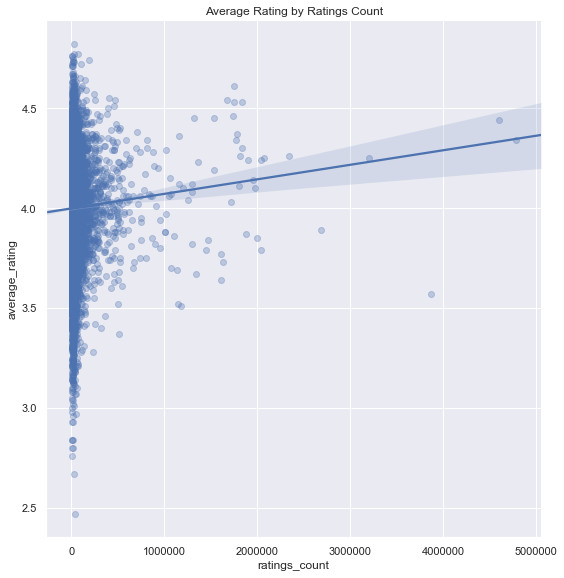

In [115]:
sns.set(style="darkgrid")
sns.lmplot(x='ratings_count',
           y='average_rating',
           data=books_df,
           height=8,
           scatter_kws={'alpha':0.3}
           )
plt.title('Average Rating by Ratings Count')
plt.show()

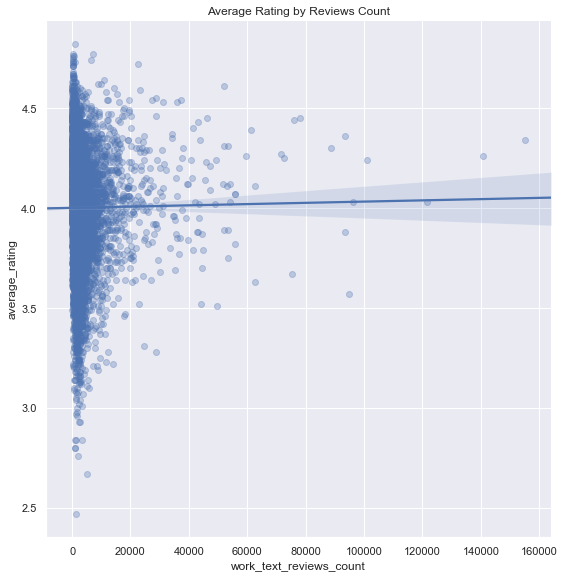

In [116]:
sns.lmplot(x='work_text_reviews_count',
           y='average_rating',
           data=books_df,
           height=8,
           scatter_kws={'alpha':0.3}
           )
plt.title('Average Rating by Reviews Count')
plt.show()

The number of reviews does not have a significant effect on `average_rating`.

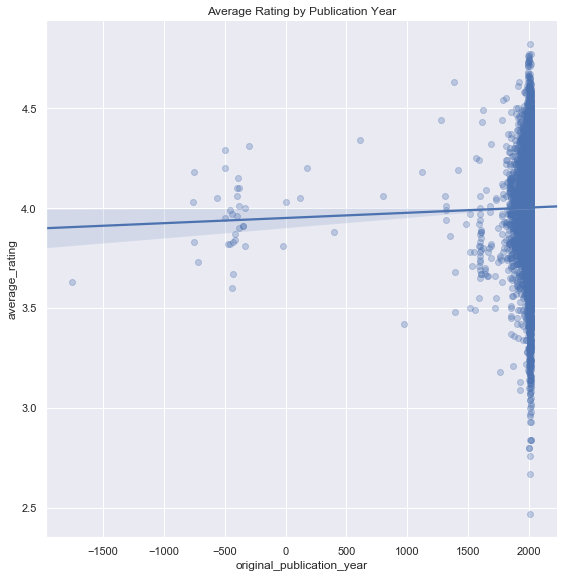

In [117]:
sns.lmplot(x='original_publication_year',
               y='average_rating',
               data=books_df,
               height=8,
               scatter_kws={'alpha':0.3}
           )
plt.title('Average Rating by Publication Year')
plt.show()

The effect of `original_publication_year` on `average_rating` is not significant. Note negative values are books published 1 BCE or earlier.

In [118]:
books_df[books_df['original_publication_year'] < 0].sample(5)[reduced_cols]

,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
2075,"Anonymous, N.K. Sandars",-1750.0,The Epic of Gilgamesh,eng,3.63,44345,55856,2247
823,"Sophocles, J.E. Thomas",-430.0,"Oedipus Rex (The Theban Plays, #1)",eng,3.67,119496,134384,2129
3948,Aristotle,-350.0,Politics,eng,3.91,22128,24041,289
402,"Sun Tzu, Thomas Cleary",-500.0,The Art of War,eng,3.95,167332,203948,6335
3403,"Herodotus, Aubrey de Sélincourt, John M. Marin...",-440.0,The Histories,eng,3.97,28870,31985,864


### Top 10

#### Most Rated Books

We'll use `work_ratings_count`, which are ratings for *all* editions, while `ratings_count` is for the particular popular edition.

In [119]:
books_df.sort_values(by='work_ratings_count', ascending=False).head(10)[reduced_cols]

,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
0,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254
1,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867
2,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009
3,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586
4,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992
5,John Green,2012.0,The Fault in Our Stars,eng,4.26,2346404,2478609,140739
11,Veronica Roth,2011.0,"Divergent (Divergent, #1)",eng,4.24,1903563,2216814,101023
6,J.R.R. Tolkien,1937.0,The Hobbit,en-US,4.25,2071616,2196809,37653
9,Jane Austen,1813.0,Pride and Prejudice,eng,4.24,2035490,2191465,49152
7,J.D. Salinger,1951.0,The Catcher in the Rye,eng,3.79,2044241,2120637,44920


#### Most Highly-Rated Books

Calvin & Hobbes and Harry Potter dominate the ratings.

In [120]:
books_df.sort_values(by='average_rating', ascending=False).head(10)[reduced_cols]

,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
3627,Bill Watterson,2005.0,The Complete Calvin and Hobbes,eng,4.82,28900,29968,861
3274,"J.K. Rowling, Mary GrandPré",2003.0,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156
861,Brandon Sanderson,2014.0,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,108176,7261
8853,Francine Rivers,1993.0,Mark of the Lion Trilogy,en-US,4.76,9081,9547,731
7946,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,ESV Study Bible,eng,4.76,8953,10784,262
4482,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,eng,4.75,22351,23429,264
6360,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,eng,4.74,16766,17285,149
421,J.K. Rowling,1998.0,"Harry Potter Boxset (Harry Potter, #1-7)",eng,4.74,190050,204125,6508
3752,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",eng,4.73,24618,26274,882
6919,Bill Watterson,1992.0,The Indispensable Calvin and Hobbes,eng,4.73,14597,16911,325


#### Oldest

In [121]:
books_df.sort_values(by='original_publication_year').head(10)[reduced_cols]

,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
2075,"Anonymous, N.K. Sandars",-1750.0,The Epic of Gilgamesh,eng,3.63,44345,55856,2247
2141,"Homer, Robert Fagles, Bernard Knox",-762.0,The Iliad/The Odyssey,eng,4.03,47825,51098,537
340,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",-750.0,The Iliad,eng,3.83,241088,273565,4763
6165,"Anonymous, Richard Wilhelm, Cary F. Baynes, C....",-750.0,The I Ching or Book of Changes,eng,4.18,12781,14700,275
78,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,The Odyssey,eng,3.73,670326,710757,8101
1119,"Aesop, Laura Harris, Laura Gibbs",-560.0,Aesop's Fables,eng,4.05,88508,98962,1441
9678,"Anonymous, Juan Mascaró",-500.0,The Upanishads: Translations from the Sanskrit,eng,4.20,7365,9667,258
402,"Sun Tzu, Thomas Cleary",-500.0,The Art of War,eng,3.95,167332,203948,6335
5636,"Anonymous, Ananda Maitreya, Thich Nhat Hanh, B...",-500.0,The Dhammapada,eng,4.29,12639,17114,616
7777,"Confucius, D.C. Lau",-476.0,The Analects,eng,3.82,9807,13227,468


#### Greatest and Least Ratings Ratio

The ratings ratio is `work_text_reviews_count` divided by `work_ratings_count`. The majority of the most-commented-on books are romance novels.

In [122]:
books_df['ratings_ratio'] = (books_df['work_text_reviews_count']
    .div(books_df['work_ratings_count']))

In [123]:
reduced_cols.append('ratings_ratio')

In [160]:
books_df.sort_values(by='ratings_ratio', ascending=False).head(10)[reduced_cols]

\begin{tabular}{lrllrrrrr}
\toprule
                                  authors &  original\_publication\_year &                                      title & language\_code &  average\_rating &  ratings\_count &  work\_ratings\_count &  work\_text\_reviews\_count &  ratings\_ratio \\
\midrule
 Cynthia Hand, Brodi Ashton, Jodi Meadows &                     2016.0 &         My Lady Jane (The Lady Janies, \#1) &           eng &            4.12 &          12794 &               15433 &                     4228 &       0.273958 \\
     Amie Kaufman, Jay Kristoff, Marie Lu &                     2016.0 &           Gemina (The Illuminae Files, \#2) &           eng &            4.56 &          10960 &               17426 &                     4612 &       0.264662 \\
               Amie Kaufman, Jay Kristoff &                     2015.0 &        Illuminae (The Illuminae Files, \#1) &           eng &            4.32 &          44500 &               49187 &                    13008 &       0.264460 

In [161]:
books_df.sort_values(by='ratings_ratio').head(10)[reduced_cols]

\begin{tabular}{lrllrrrrr}
\toprule
                                           authors &  original\_publication\_year &                                              title & language\_code &  average\_rating &  ratings\_count &  work\_ratings\_count &  work\_text\_reviews\_count &  ratings\_ratio \\
\midrule
                                 Cynthia J. McGean &                     1997.0 &                                     Henry \& Ramona &           NaN &            4.14 &          11106 &               11106 &                        3 &       0.000270 \\
                  John D. Rateliff, J.R.R. Tolkien &                     2007.0 &   The History of the Hobbit, Part One: Mr. Baggins &           eng &            3.81 &         108399 &              108445 &                       46 &       0.000424 \\
                                      Frank Miller &                     1991.0 &              Sin City: Una Dura Despedida, \#1 de 3 &           NaN &            4.21 &           9115

## Ratings

In [162]:
ratings_df.head()

\begin{tabular}{rrr}
\toprule
 user\_id &  book\_id &  rating \\
\midrule
       1 &      258 &       5 \\
       2 &     4081 &       4 \\
       2 &      260 &       5 \\
       2 &     9296 &       5 \\
       2 &     2318 &       3 \\
\bottomrule
\end{tabular}



In [127]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    uint16
book_id    uint16
rating     uint8
dtypes: uint16(2), uint8(1)
memory usage: 28.5 MB


In [128]:
# Check that the set of ids are equivalent to the integers from 1 to max id
assert(len(ratings_df.user_id.unique()) == ratings_df.user_id.max())
assert(len(ratings_df.book_id.unique()) == ratings_df.book_id.max())

print('The number of users is: ' + str(len(ratings_df.user_id.unique())))
print('The number of books is: ' + str(len(ratings_df.book_id.unique())))

The number of users is: 53424
The number of books is: 10000


In [129]:
def plot_hist(series,
              bins=None,
              figsize=(12,8),
              cm='RdYlGn',
              density=True,
              title=None):
    
    plt.figure(figsize=figsize)
    plt.title(title)
    cm = plt.cm.get_cmap(cm)

    n, bins, patches = plt.hist(series, bins=bins, density=density)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    # scale values to interval [0,1]
    col = bin_centers - min(bin_centers)
    col /= max(col)
    
    # set colors
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

    plt.show()

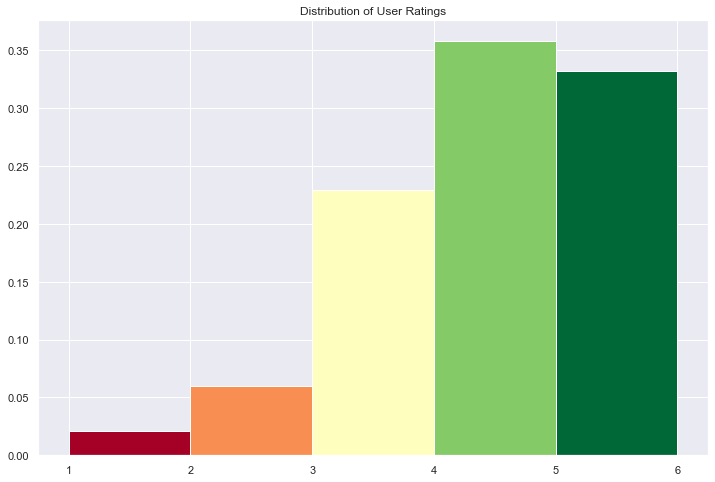

In [130]:
plot_hist(ratings_df['rating'],
          bins=list(range(1,7)),
          title='Distribution of User Ratings')

### Ratings by Book

The distribution of reviews per book in `ratings_df` is left skew. The range is 8–22806 though the interquartile range is 155–503.

In [131]:
ratings_by_book = ratings_df.groupby('book_id').book_id.count()
ratings_by_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

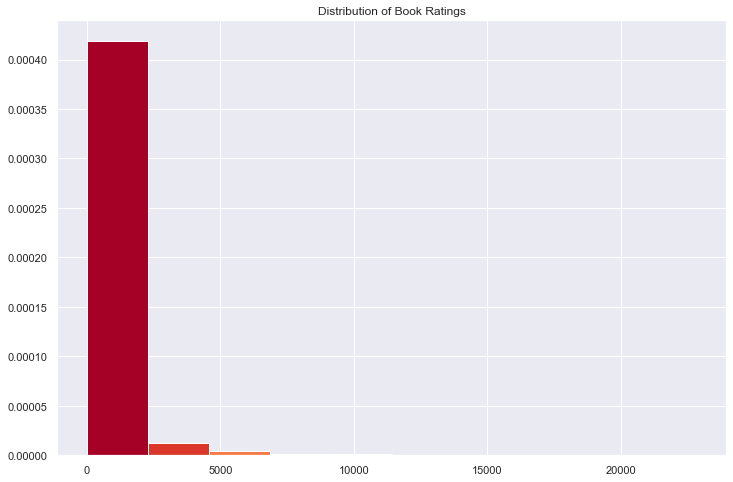

In [150]:
plot_hist(ratings_by_book, 
          title='Distribution of Book Ratings')

The tail is long; below we plot the distribution for books with fewer than 1000 ratingss.

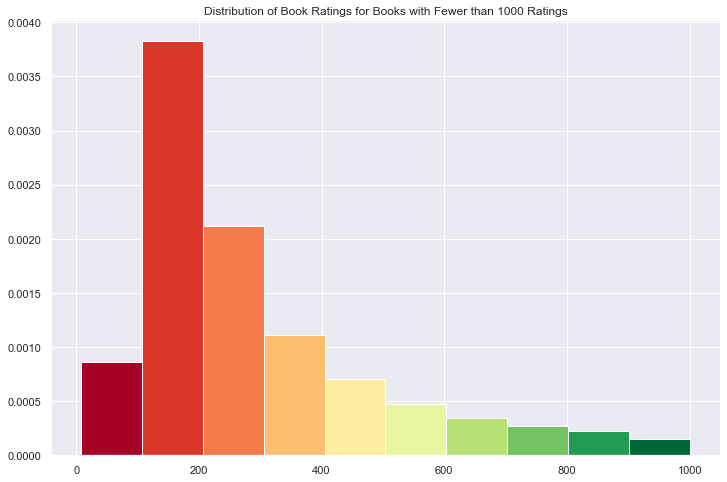

In [151]:
plot_hist(ratings_by_book[ratings_by_book <= 1000],
          title='Distribution of Book Ratings for Books with Fewer than 1000 Ratings')

### Ratings by User

The range of reviews by user is 19–200.

In [134]:
ratings_by_user = ratings_df.groupby('user_id').user_id.count()
ratings_by_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

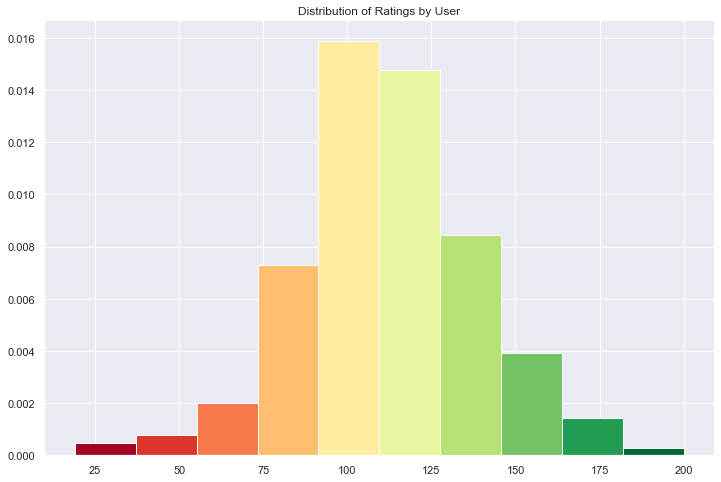

In [153]:
plot_hist(ratings_by_user,
          title='Distribution of Ratings by User')

## Tags

### To-Read
This is the only tag we will consider in this version of the model. We can optionally let users decide against recommendations of books in this list. Most users tag at least one book to-read and almost all books are tagged to-read by some user.

In [163]:
to_read_df.head()

\begin{tabular}{rr}
\toprule
 user\_id &  book\_id \\
\midrule
       9 &        8 \\
      15 &      398 \\
      15 &      275 \\
      37 &     7173 \\
      34 &      380 \\
\bottomrule
\end{tabular}



In [137]:
to_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


In [138]:
print('Count of users who marked some book to-read: '
      + str(len(to_read_df.user_id.unique())))

print('Count of books marked to-read by some user: '
      + str(len(to_read_df.book_id.unique())))

Count of users who marked some book to-read: 48871
Count of books marked to-read by some user: 9986


### Other Tags

We can incorporate this implicit data in a future version. The following code and markdown are quoted directly from goodbooks-10k/quick_look.ipynb:

In [139]:
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [140]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [141]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [142]:
book_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
goodreads_book_id    999912 non-null int64
tag_id               999912 non-null int64
count                999912 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


Let us merge tag names into tag applications.

In [143]:
book_tags_df = book_tags_df.merge( tags_df, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [144]:
book_tags_df = book_tags_df.merge(
    books_df[['goodreads_book_id', 'title']],
    on='goodreads_book_id')

It appears that there are some negative tag counts. Let's fix this.

In [145]:
book_tags_df['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [146]:
book_tags_df[book_tags_df['count'] < 0]

,goodreads_book_id,tag_id,count,tag_name,title
920799,18607805,10197,-1,ebook,Kindle Paperwhite User's Guide
920815,18607805,17246,-1,kindle-library,Kindle Paperwhite User's Guide
920823,18607805,21619,-1,no-audio,Kindle Paperwhite User's Guide
920854,18607805,6552,-1,challenge-2013,Kindle Paperwhite User's Guide
920855,18607805,2272,-1,america-in-retreat,Kindle Paperwhite User's Guide
958159,22931009,9221,-1,default,Kindle User's Guide


In [147]:
book_tags_df = book_tags_df[~(book_tags_df['count'] < 0)]

Sample some popular book tags.

In [148]:
book_tags_df.sample(10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
135900,16902,30574,107353,to-read,Walden
19500,2612,30574,320295,to-read,The Tipping Point: How Little Things Can Make ...
903019,17927395,33012,65,ya-fiction,A Court of Mist and Fury (A Court of Thorns an...
613994,2429135,30574,586235,to-read,"The Girl with the Dragon Tattoo (Millennium, #1)"
159000,22328,30574,23015,to-read,Neuromancer
169700,24784,30574,13277,to-read,The Black Cauldron (The Chronicles of Prydain #2)
84900,10572,30574,125170,to-read,"A Clash of Kings (A Song of Ice and Fire, #2)"
587694,1297985,30574,55145,to-read,Musicophilia: Tales of Music and the Brain
469294,294047,30574,9696,to-read,Amazonia
670894,6411961,30574,98533,to-read,"The Lost Symbol (Robert Langdon, #3)"


These are the most popular tags:

In [149]:
tag_counts = book_tags_df.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8238
ebook                8053
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64